In [19]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

In [3]:
with open('../data/helper/df_repos_metadata.json', 'r') as file:
    loaded_data = json.load(file)

In [4]:
df = pd.DataFrame(data=loaded_data)

In [7]:
df.head(3)

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,open_issues_count,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score
0,3342055,node-gyp,nodejs/node-gyp,https://github.com/nodejs/node-gyp,Node.js native addon build tool,https://api.github.com/repos/nodejs/node-gyp,https://api.github.com/repos/nodejs/node-gyp/l...,2012-02-03T05:50:50Z,2025-04-06T10:59:57Z,2025-04-02T09:09:43Z,...,152,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[gyp, node, node-addon, node-gyp, nodejs]",public,1822,152,10158,main,1.0
1,266613704,practical-python,dabeaz-course/practical-python,https://github.com/dabeaz-course/practical-python,Practical Python Programming (course by @dabeaz),https://api.github.com/repos/dabeaz-course/pra...,https://api.github.com/repos/dabeaz-course/pra...,2020-05-24T19:50:08Z,2025-04-07T06:47:25Z,2024-08-10T03:38:37Z,...,16,"{'key': 'cc-by-sa-4.0', 'name': 'Creative Comm...",True,"[python, pythontutorial, tutorial]",public,6740,16,10154,master,1.0
2,175052225,EverydayWechat,sfyc23/EverydayWechat,https://github.com/sfyc23/EverydayWechat,微信助手：1.每日定时给好友（女友）发送定制消息。2.机器人自动回复好友。3.群助手功能（例...,https://api.github.com/repos/sfyc23/EverydayWe...,https://api.github.com/repos/sfyc23/EverydayWe...,2019-03-11T17:38:45Z,2025-04-07T08:54:49Z,2021-06-22T02:56:06Z,...,25,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[ai, autoreply, bot, chat, chatbot, itchat, py...",public,2316,25,10137,master,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1050 non-null   int64  
 1   name               1050 non-null   object 
 2   full_name          1050 non-null   object 
 3   html_url           1050 non-null   object 
 4   description        1038 non-null   object 
 5   url                1050 non-null   object 
 6   labels_url         1050 non-null   object 
 7   created_at         1050 non-null   object 
 8   updated_at         1050 non-null   object 
 9   pushed_at          1050 non-null   object 
 10  size               1050 non-null   int64  
 11  stargazers_count   1050 non-null   int64  
 12  watchers_count     1050 non-null   int64  
 13  language           1050 non-null   object 
 14  has_issues         1050 non-null   bool   
 15  has_projects       1050 non-null   bool   
 16  has_downloads      1050 

### analyse if repo is in English

In [12]:
df_testi = df.head(30)

In [ ]:
df_testi

In [11]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

In [14]:
df['language_spoken'] = df['description'].apply(detect_language)

In [17]:
len(df[df['language_spoken'] == 'en'])

927

### analyse numeric values

In [9]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,1.050000e+03,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.0
mean,2.826823e+08,1.310135e+05,21658.149524,21658.149524,3550.411429,374.326667,3550.411429,374.326667,21658.149524,1.0
std,2.786312e+08,4.969616e+05,29854.040556,29854.040556,5963.909839,1000.453865,5963.909839,1000.453865,29854.040556,0.0
min,2.655400e+04,7.000000e+00,7155.000000,7155.000000,108.000000,0.000000,108.000000,0.000000,7155.000000,1.0
25%,4.839618e+07,5.204000e+03,8801.750000,8801.750000,987.250000,55.000000,987.250000,55.000000,8801.750000,1.0
50%,1.609191e+08,2.378450e+04,12282.000000,12282.000000,1810.500000,137.000000,1810.500000,137.000000,12282.000000,1.0
75%,5.699511e+08,8.295050e+04,21991.000000,21991.000000,3420.250000,331.000000,3420.250000,331.000000,21991.000000,1.0
max,9.463802e+08,1.082157e+07,335129.000000,335129.000000,49161.000000,15996.000000,49161.000000,15996.000000,335129.000000,1.0


In [55]:
df['stargazers_count'].value_counts().sort_index(ascending=False)

stargazers_count
335129    2
295694    2
239545    2
199202    1
199201    1
         ..
7187      1
7184      1
7173      1
7161      1
7155      1
Name: count, Length: 993, dtype: int64

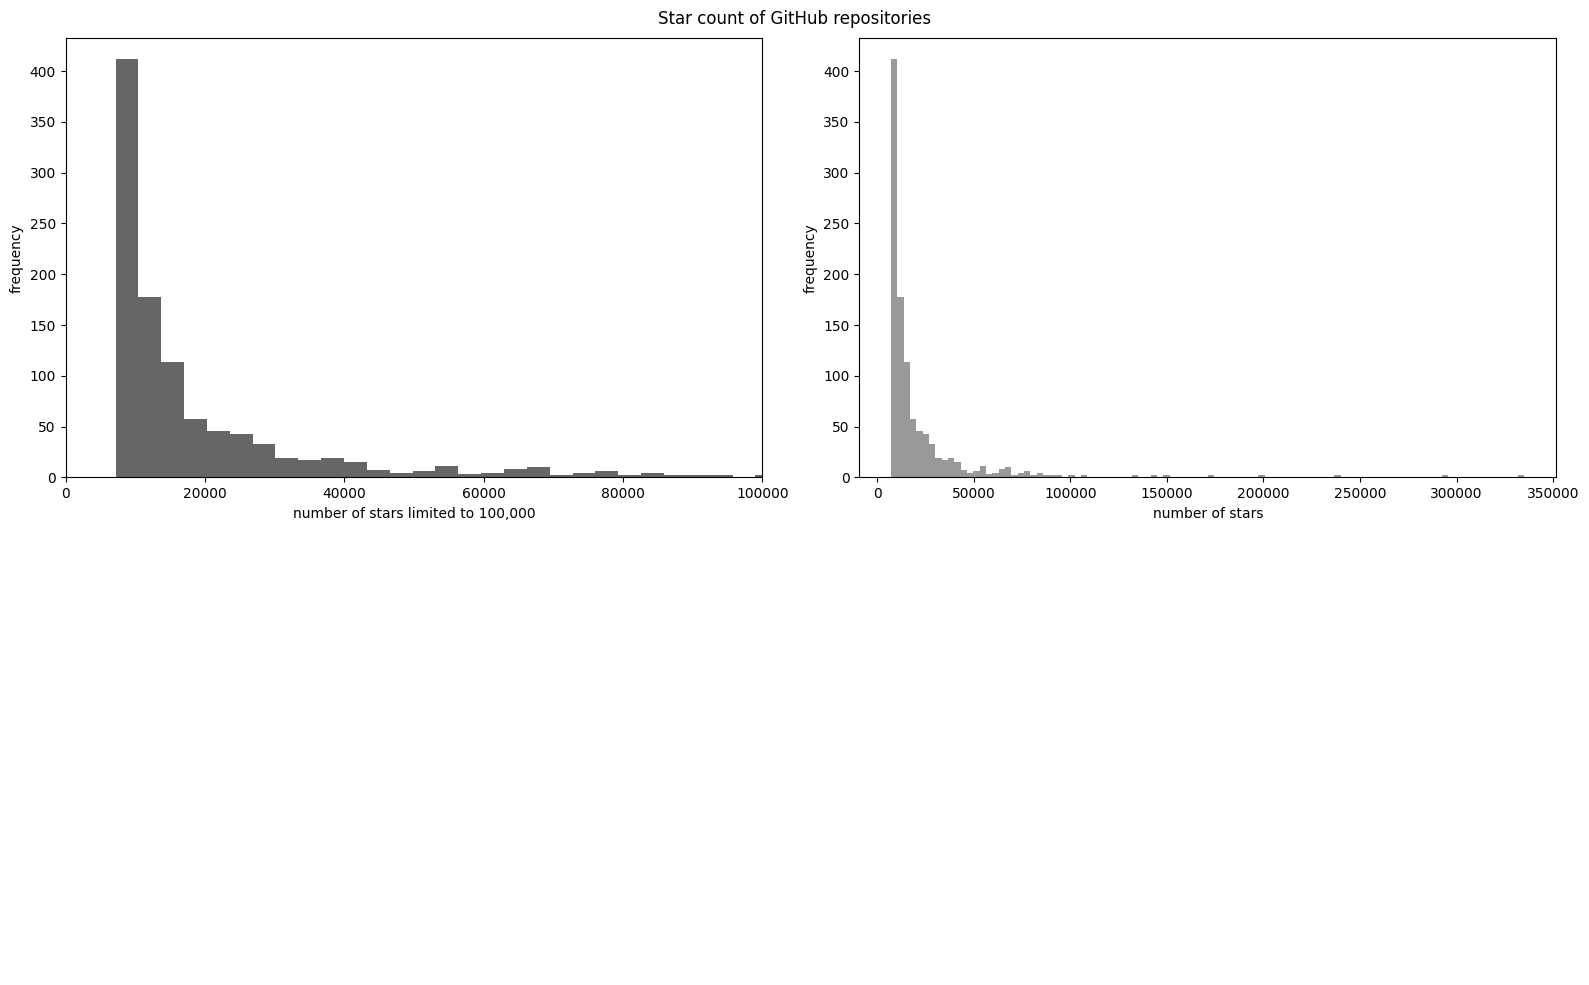

In [82]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=100)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

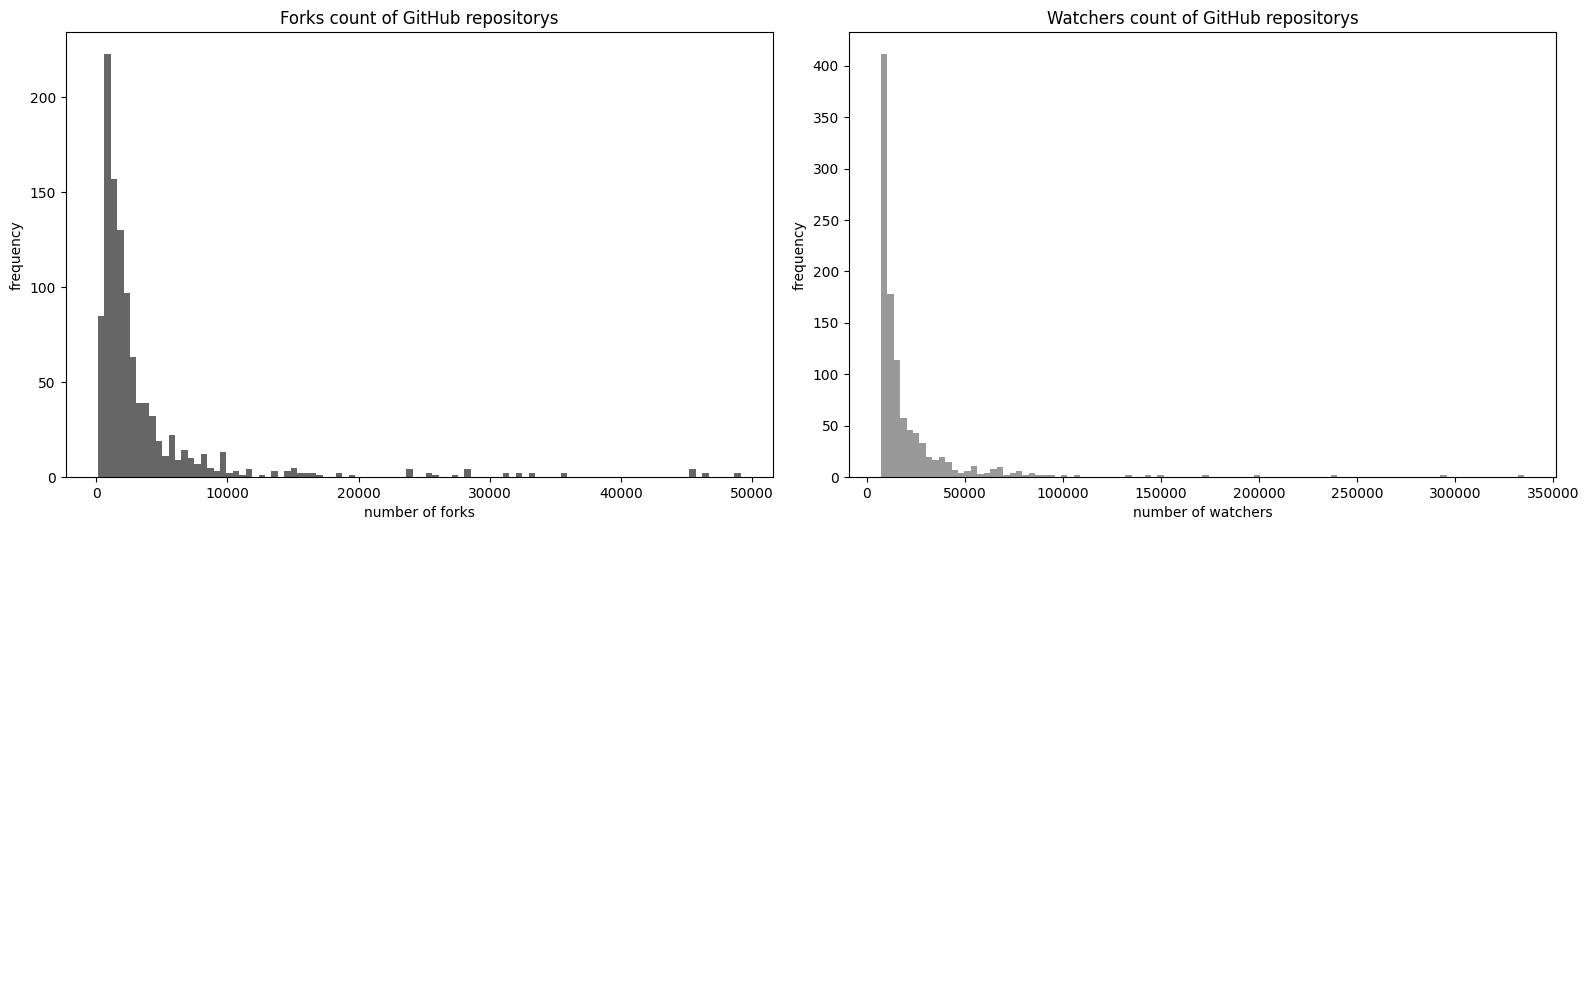

In [86]:
# number of forks & watchers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['forks_count'], color='0.4', bins=100)
ax[0,1].hist(df['watchers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
ax[0,0].set_title('Forks count of GitHub repositorys')
ax[0,1].set_title('Watchers count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of forks')
ax[0,1].set_xlabel('number of watchers')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
#ax[0,0].set_xlim(0, 100000)

# fig.suptitle('Forks count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

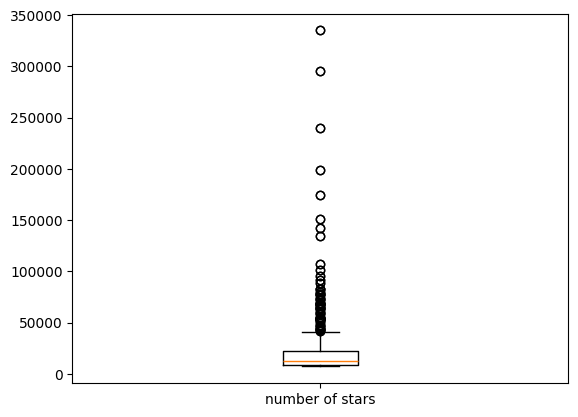

In [30]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()